In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [0]:
!pwd

/content/drive/My Drive/dsps


In [0]:
ls

 BuildingsEnergyOwners.ipynb        rows.csv
 galaxy-zoo-the-galaxy-challenge/   scatter.pdf
 interactingWDrive.ipynb            SNdataLineFit.ipynb
 jla_likelihood_v6/                'SP.POP.TOTL?downloadformat=excel'
 jla_likelihood_v6.tgz              zbp/
 nyc_pluto_18v2_1_csv.zip           zbp16detail.zip
 pluto_18v2_1.csv                   zbp16totals.txt
 PLUTODD18v2.1.pdf                  zbp16totals.zip
 PlutoReadme18v2.1.pdf


In [0]:
cd galaxy-zoo-the-galaxy-challenge/

/content/drive/My Drive/dsps/galaxy-zoo-the-galaxy-challenge


In [0]:
#import json
#import os
#envs = json.load(open("../kaggle.json", "r"))
#os.environ["KAGGLE_USERNAME"] = envs['username']
#os.environ["KAGGLE_KEY"] = envs['key']


In [0]:
# !kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

all_ones_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
all_zeros_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
central_pixel_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
images_training_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
images_test_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
training_solutions_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
ls

all_ones_benchmark.zip       images_test_rev1.zip
all_zeros_benchmark.zip      images_training_rev1.zip
central_pixel_benchmark.zip  training_solutions_rev1.zip


In [0]:
!unzip images_training_rev1.zip 

Archive:  images_training_rev1.zip
replace images_training_rev1/100008.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!ls images_training_rev1

100008.jpg  122292.jpg	145094.jpg  167074.jpg	188440.jpg  209908.jpg
100023.jpg  122293.jpg	145104.jpg  167080.jpg	188448.jpg  209914.jpg
100053.jpg  122294.jpg	145106.jpg  167086.jpg	188455.jpg  209934.jpg
100078.jpg  122295.jpg	145144.jpg  167093.jpg	188497.jpg  209936.jpg
100090.jpg  122296.jpg	145145.jpg  167095.jpg	188505.jpg  209957.jpg
100122.jpg  122298.jpg	145154.jpg  167102.jpg	188515.jpg  209965.jpg
100123.jpg  122307.jpg	145177.jpg  167104.jpg	188516.jpg  209984.jpg
100128.jpg  122362.jpg	145183.jpg  167259.jpg	188533.jpg  209986.jpg
100134.jpg  122371.jpg	145197.jpg  167266.jpg	188538.jpg  209994.jpg
100143.jpg  122402.jpg	145198.jpg  167284.jpg	188547.jpg  209998.jpg
100150.jpg  122415.jpg	145206.jpg  167288.jpg	188550.jpg  210003.jpg
100157.jpg  122444.jpg	145215.jpg  167305.jpg	188558.jpg  210019.jpg
100187.jpg  122445.jpg	145248.jpg  167311.jpg	188569.jpg  210020.jpg
100204.jpg  122469.jpg	145282.jpg  167317.jpg	188595.jpg  210027.jpg
100237.jpg  122477.jpg	145289.jpg 

In [0]:
!unzip training_solutions_rev1.zip

Archive:  training_solutions_rev1.zip
  inflating: training_solutions_rev1.csv  


In [0]:
import pandas as pd
training_labels = pd.read_csv("training_solutions_rev1.csv")

In [0]:
import pylab as pl
import cv2
import numpy as np

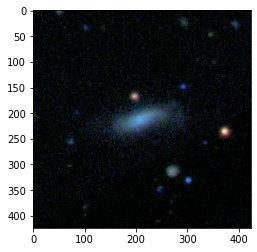

In [0]:
img = np.asarray(cv2.imread("images_training_rev1/187580.jpg"))
pl.imshow(img)

In [0]:
import glob
ims = np.zeros([1000, img.shape[0], img.shape[1], img.shape[2]], dtype=np.uint8)
for i,im in enumerate(glob.glob("images_training_rev1/*")[:1000]):

  ims[i] = np.asarray( cv2.imread(im))


In [0]:
ims.shape

(1000, 424, 424, 3)

In [0]:
training_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [0]:
nga = training_labels["Class1.3"]
spi = training_labels[["Class5.1", "Class5.2", "Class5.3", "Class5.4"]].max(axis=1)
ell = training_labels["Class6.2"]
irr = training_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].max(axis=1)
training_labels2 = pd.DataFrame({"nga": nga, "spi":spi, "ell":ell, "irr":irr})

In [0]:
training_labels2

,nga,spi,ell,irr
0,0.000000,0.512101,0.945547,0.027226
1,0.009222,0.236781,0.810851,0.140353
2,0.056931,0.117790,1.000000,0.000000
3,0.068059,0.125280,0.679602,0.128159
4,0.066161,0.000000,0.970617,0.029383
...,...,...,...,...
61573,0.000000,0.260804,0.754266,0.175454
61574,0.000000,0.053406,0.872356,0.062095
61575,0.019783,0.347328,0.160814,0.604214
61576,0.000000,0.545764,0.136000,0.500256


In [0]:
newclass = [np.where(training_labels2.iloc[i] == np.max(training_labels2.iloc[i]))[0][0] for i in range(len(training_labels2))]

In [0]:
len(newclass)

61578

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ims, np.array(newclass[:1000]), test_size=0.33, random_state=42)

In [0]:
X_train.shape

(670, 424, 424, 3)

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:

model = keras.Sequential([keras.layers.Flatten(input_shape=(424,424,3)),
                         #  keras.layers.Dense(1000, activation=tf.nn.relu),  keras.layers.Dense(256, activation=tf.nn.relu),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid), 
                          #keras.layers.Dense(256, activation=tf.nn.relu), keras.layers.Dense(128, activation=tf.nn.relu), 
                         # keras.layers.Dense(30, activation=tf.nn.relu),
                         keras.layers.Dense(10,activation=tf.nn.softmax) ])
                                              

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(X_train, y_train, epochs=5)

Train on 670 samples
Epoch 1/5
670/670 [==============================] - 7s 10ms/sample - loss: 0.8900 - acc: 0.8358
Epoch 2/5
670/670 [==============================] - 6s 10ms/sample - loss: 0.6166 - acc: 0.8791
Epoch 3/5
670/670 [==============================] - 7s 10ms/sample - loss: 0.5601 - acc: 0.8791
Epoch 4/5
670/670 [==============================] - 7s 10ms/sample - loss: 0.5311 - acc: 0.8791
Epoch 5/5
670/670 [==============================] - 6s 9ms/sample - loss: 0.5130 - acc: 0.8791


In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

330/330 [==============================] - 1s 3ms/sample - loss: 0.3893 - acc: 0.9152


In [0]:
score = model.evaluate(X_test, y_test)


330/330 [==============================] - 1s 3ms/sample - loss: 0.3893 - acc: 0.9152


In [0]:
score

[0.3893002035039844, 0.91515154]

In [0]:
from scipy import ndimage, misc
newimg = np.zeros([1000*5, img.shape[0], img.shape[1], img.shape[2]], 
                  dtype=np.uint8)
np.random.seed(123)
for i in range(len(ims)):
  angles = np.random.rand(4) *   180
  newimg[i*5] = ims[i].copy()
  for j,a in enumerate(angles):

    newimg[i*5+1+j] = ndimage.rotate(newimg[i*5], a, 
                                         reshape=False, mode='mirror')



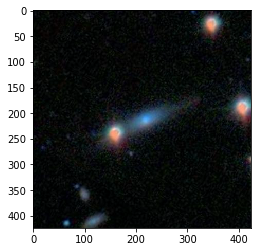

In [0]:
pl.imshow(ims[0])

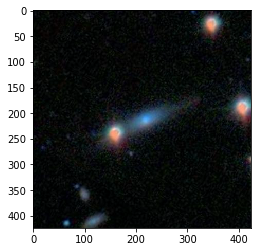

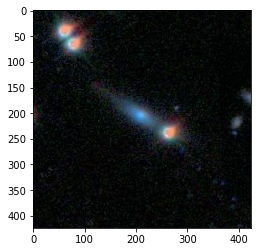

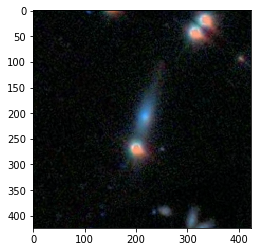

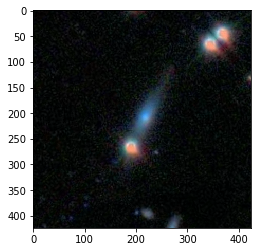

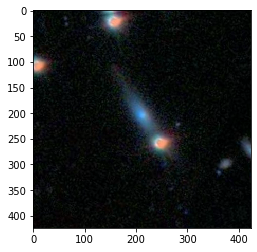

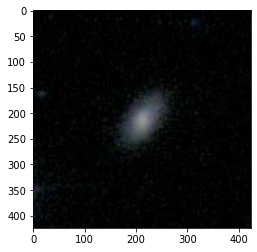

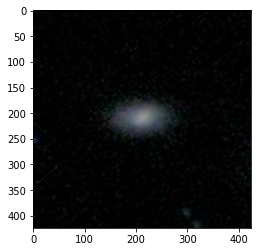

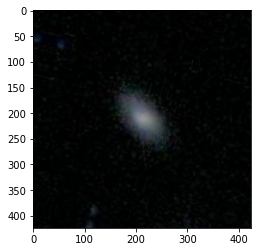

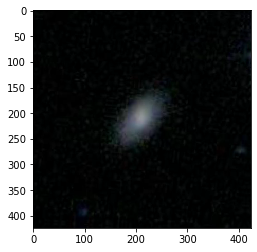

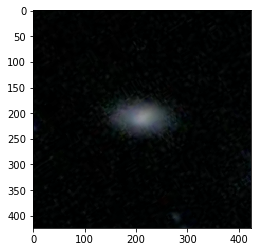

In [0]:

for i in range (10):
  pl.imshow(newimg[i])
  pl.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(newimg, 
                                                    
                      foo = np.arange(5)
bar = np.vstack([foo for i in range(4)])np.array(newclass[:1000]), test_size=0.33, random_state=42)
model.fit(X_train, y_train, epochs=5)

## Conv2D

In [0]:
batch_size = 128
num_classes = 4
epochs = 5
input_shape = ims[0].shape

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import adam
# Set Optimizer
opt = adam(lr=0.001, decay=1e-6)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=opt,
              metrics=['accuracy'])


In [0]:
model.fit(X_train, ytrain, epochs=5)


In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)


In [0]:
score = model.evaluate(X_test, y_test)
score